En este ejemplo se calcula la transformada de Fourier 2D de una imagen construida con oscilaciones cosenoidales a lo largo de los ejes X y Y. Se suma un valor offset igual a 1 para que los valores de la intensidad de la imagen sean siempre positivos.

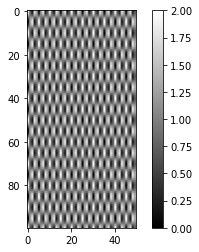

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

image = np.zeros((100,50))
sizeX=np.shape(image)[1] #Número de columnas
sizeY=np.shape(image)[0] #Número de filas

freqX=0.3 #La frecuencia estaría en unidades de oscilaciones/pixel. La frecuencia de muestreo sería siempre 1 (una muestra por pixel).
freqY=0.1 #En este caso, una oscilación tomaría 1/0.1=10 pixeles.

for i in range (sizeX):
  for j in range (sizeY):
    image[j][i]=np.cos(2*np.pi*freqX*i)*np.cos(2*np.pi*freqY*j)+1 #El 1 is un offset, ya que la imagen solo lleva valores positivos.

plt.imshow(image, cmap='gray')
plt.colorbar()

Ahora calculamos la transformada de Fourier 2D.



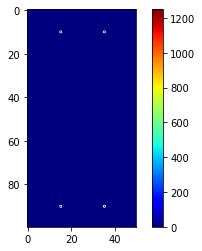

In [ ]:
imageFFT=np.fft.fft2(image)
plt.imshow(abs(imageFFT), cmap='jet')
plt.colorbar()

Notar que los ejes X y Y siguen teniendo el mismo tamaño de la imagen (como en el caso 1D), pero cada avance de un "pixel" en el espacio de Fourier representa 1/N unidades de frecuencia. Por ejemplo, en el eje X vemos un máximo en el "pixel" px=15, que equivaldría a la frecuencia fx=15x1/50=0.3 como era de esperarse.
Del mismo modo en el eje Y vemos un máximo en el "pixel" py=10, que equivale a la frecuencia fy=10x1/100=0.1 como se espera.
Como se observó en el caso 1D, la transformada de Fourier entrega un arreglo2D, donde el primer elemento de cada eje corresponde a la frecuencia 0, los siguientes elementos corresponden a frecuencias positivas en el intervalo (0:F_sample/2) y los siguientes a frecuencias negativas en el intervalo (-F_sample/2:0). Por esta razón se observan 4 máximos en lugar de dos (F_sample es la frecuencia de muestreo que en este caso es 1). Discutir el significado de la amplitud en el espacio de Fourier (recordar lo discutido en el caso 1D).
Notar la frecuencia 0 debida al offset.


Para solo tomar en cuenta las frecuencias positivas, se puede usar np.ffr.rfft() como en el caso 1D. Del mismo modo se puede usar la función np.fft.fftshift() para que la frecuencia cero quede en el centro.

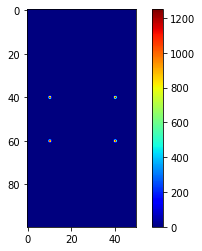

In [ ]:
imageFFT=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(image)))
plt.imshow(abs(imageFFT), cmap='jet')
plt.colorbar()

Ejercicio: Cambiar la escala de los ejes X y Y para que sean la frecuencia.